# **3.알고리즘, 시각화, 응용**

# 3.2 3차시 2강

## 사전준비

### 1.라이브러리 

In [1]:
# 3.2.0.1.1 colab에는 mlxtend 가 설치 되어 있으나 버전이 낮다. 업그레이드 한다. 
!pip install mlxtend -U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.9 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
# 3.2.0.1.2 pyECLAT 을 설치
! pip install pyECLAT

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# 3.2.0.1.3 수업에 필요한 라이브러리 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# mlxtend 라이브러리 import
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

# pyECLAT 라이브러리 import
from pyECLAT import ECLAT

# 네트워크 그래프  import
import networkx as nx

/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.

### 2.Grocery 데이터 준비

In [4]:
# 3.2.0.2 grocery 데이터를 읽어 들이고 분석에 사용할 수 있는 형태로 가공한다. 
# grocery_csv : 트랜잭션별 구매항목 목록 
# grocery_tr  : 트랜잭션 x 항목 형태집계표 형태

# grocery 거래정보 : 9865 트랜잭션,   169개 상품 항목
# 최소지지도 0.02에서 122개 빈발항목 생성
# 최소지지도 0.02, 최소신뢰도 0.3에서 34개 규칙 생성

 
# grocery 데이터를 읽어 들인다.  
grocery_csv = pd.read_csv('https://github.com/sagelab4data/kdata_yonsei/blob/main/groceries.csv?raw=true', 
                          header = None)

# grocery 데이터를 apyori 라이브러리에서 사용 할 수 있는 형태인 리스트 형태로 변환한다. 
grocery_list = [ row_series.dropna().to_list() for idx, row_series in grocery_csv.iterrows()]

# 집계표 형태로 변환
te = TransactionEncoder()
te_ary = te.fit(grocery_list).transform(grocery_list)
grocery_tr = pd.DataFrame(te_ary, columns = te.columns_)

print (f'grocery_csv shape :{grocery_csv.shape}, grocery_tr shape : {grocery_tr.shape}')

grocery_csv shape :(9835, 32), grocery_tr shape : (9835, 169)


In [5]:
grocery_csv.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
grocery_tr.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### 3.Online Retail 데이터 준비

In [7]:
# 3.2.0.3 online 데이터를 읽어 들이고 분석에 사용할 수 있는 형태로 가공한다. 
# online : 정규형화된 형태의 부가 정보를 보유한 원천 데이터 (long format 541,909행)
# online_tr  : 트랜잭션 x 항목 형태집계표 형태 (클랜징 후)

# online 거래 정보: 20,133 트랜잭션,   4,064개 상품 항목
# 최소지지도 0.01에서 1,853개 빈발항목 생성
# 최소지지도 0.01, 최소신뢰도 0.6에서 498개 규칙 생성

 
# gronlineocery 데이터를 읽어 들인다.  
gitpath ='https://github.com/sagelab4data/kdata_yonsei/blob/main/Online%20Retail.xlsx?raw=true'
online = pd.read_excel(gitpath)

# online클랜징 
online_tmp = online.copy()  # 슬라이스를 사용하지 않기 위해 복제본 생성
online_tmp['Description'] = online_tmp['Description'].str.strip() # Description 앞뒤 공백제거

cleansing_bool = (online.InvoiceNo.astype('str').str.isnumeric()) & \
                  (online_tmp.Description.notnull()) &\
                  (online_tmp.Quantity > 0 )   # 클랜징 규칙생성           

online_tmp = online_tmp[cleansing_bool]  # online_tmp 필터링

# 집계표 형태로 변환 (pivot_table 이용)
def isExist(s) :
  return True if s.count() > 0 else False

online_tr =  online_tmp.pivot_table(values = 'Quantity',
                                         index= 'InvoiceNo', 
                                         columns = 'Description',
                                         aggfunc = isExist  ).fillna(False)
online_tr.shape
print (f'online shape :{online.shape}, online_tr shape : {online_tr.shape}')

online shape :(541909, 8), online_tr shape : (20133, 4064)


In [8]:
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
online_tr.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,returned,taig adjust,test,to push order througha s stock was,website fixed,wrongly coded 20713,wrongly coded 23343,wrongly marked,wrongly marked 23343,wrongly sold (22719) barcode
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536366,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 3.2.1 다양한 알고리즘 비교 

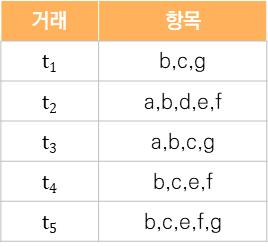

### 3.2.1.1 수업 예시 데이터 준비

In [10]:
# 3.2.1.1  수업 예시 데이터 준비 
# 3.2.1.1.1  데이터 입력
sample = [***]
sample

[['b', 'c', 'g'],
 ['a', 'b', 'd', 'e', 'f'],
 ['a', 'b', 'c', 'g'],
 ['b', 'c', 'e', 'f'],
 ['b', 'c', 'e', 'f', 'g']]

In [11]:
# 3.2.1.1.2 crosstab 집계표 형태로 변환
te = ***()
sample_ary = te.***(sample)
sample_tr = pd.DataFrame(***, columns =  ***)
sample_tr

,a,b,c,d,e,f,g
0,False,True,True,False,False,False,True
1,True,True,False,True,True,True,False
2,True,True,True,False,False,False,True
3,False,True,True,False,True,True,False
4,False,True,True,False,True,True,True


In [12]:
# 3.2.1.1.2 거래별 항목목록을 갖는 형태로 변환
sample_csv = pd.DataFrame(***)
sample_csv

,0,1,2,3,4
0,b,c,g,None,None
1,a,b,d,e,f
2,a,b,c,g,None
3,b,c,e,f,None
4,b,c,e,f,g


### 3.2.1.2 Apriori

In [13]:
# 3.2.1.2 apriori 를 이용하여 빈발 항목을 도출 
# 3.2.1.2.1  전체 빈발항목목록을 도출하기 위해 최소지지도는 0.1을 지정
freq_its_sp_1 = ***
freq_its_sp_1

,support,itemsets
0,0.4,(a)
1,1.0,(b)
2,0.8,(c)
3,0.2,(d)
4,0.6,(e)
...,...,...
56,0.2,"(e, b, d, f)"
57,0.2,"(e, g, b, f)"
58,0.2,"(e, g, f, c)"
59,0.2,"(a, f, e, b, d)"


* 61개 조합이 존재

In [14]:
# 3.2.1.2.2  수업에서 사용한 최소지지도는 0.4를 지정
freq_its_sp_4 = apriori(sample_tr, min_support = 0.4, use_colnames = True)
print(freq_its_sp_4.shape)
freq_its_sp_4

(21, 2)


,support,itemsets
0,0.4,(a)
1,1.0,(b)
2,0.8,(c)
3,0.6,(e)
4,0.6,(f)
5,0.6,(g)
6,0.4,"(b, a)"
7,0.8,"(b, c)"
8,0.6,"(e, b)"
9,0.6,"(b, f)"


* 수업에서 확인한 21건의 목록 (2개 항목이상 15건)을 확인

In [15]:
# 3.2.1.2.3  신뢰도 0.7을 지정하여 연관규칙 도출
asso_rule_sp_4_7 = association_rules(freq_its_sp_4, 
                                     metric = 'confidence', 
                                     min_threshold= 0.7)
asso_rule_sp_4_7.sort_values(['confidence','lift'],
                             ascending = False, 
                             inplace = True)
print(asso_rule_sp_4_7.shape)
asso_rule_sp_4_7

(29, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(e),(f),0.6,0.6,0.6,1.00,1.666667,0.24,inf
9,(f),(e),0.6,0.6,0.6,1.00,1.666667,0.24,inf
17,"(e, b)",(f),0.6,0.6,0.6,1.00,1.666667,0.24,inf
19,"(b, f)",(e),0.6,0.6,0.6,1.00,1.666667,0.24,inf
20,(e),"(b, f)",0.6,0.6,0.6,1.00,1.666667,0.24,inf
21,(f),"(e, b)",0.6,0.6,0.6,1.00,1.666667,0.24,inf
22,"(e, c)",(f),0.4,0.6,0.4,1.00,1.666667,0.16,inf
23,"(f, c)",(e),0.4,0.6,0.4,1.00,1.666667,0.16,inf
24,"(e, b, c)",(f),0.4,0.6,0.4,1.00,1.666667,0.16,inf
26,"(b, c, f)",(e),0.4,0.6,0.4,1.00,1.666667,0.16,inf


* 29건의 규칙 생성

### 3.2.1.3 Eclat 

In [ ]:
# 3.2.1.3 pyECLAT으로 Eclat 수행
#   Eclat,  mlxtend는 Eclat 알고리즘을 제공하지 않는다. pyECLAT을 사용한다. 
#   (mlxtend와 작동방식이 다르다.)
# 3.2.1.3.1 pyECLAT은 ECLAT 객체를 생성하여 분석을 수행하며, 
#   입력데이터는 거래별 항목을 갖는 csv 형태를 받는다. 

eclat_instance = ECLAT(***, verbose = True)


In [ ]:
# 3.2.1.3.2  ECLAT 객체에서 분석을 위해 생성한 집계표
eclat_instance.df_bin

In [ ]:
# 3.2.1.3.3  ECLAT 객체에서 분석을 위해 생성한 항목 목록
eclat_instance.uniq_

In [ ]:
# 3.2.1.3.4 지지도 0.4와 인수를 지정하여 실행
get_ECLAT_indexes, get_ECLAT_supports = \
          eclat_instance.fit(min_support=0.4,
                             min_combination=1,
                             max_combination=4,
                             separator=',',
                             verbose=True)


In [ ]:
# 3.2.1.3.5 조건을 충족하는 항목의 지지도
print(len(get_ECLAT_supports))
get_ECLAT_supports

In [ ]:
# 3.2.1.3.6 조건을 충족하는 항목의 Tid Set
get_ECLAT_indexes

### 3.2.1.4 FP-Growth

In [ ]:
# 3.2.1.2.4  mlxtend 라이브러리의 fpgrowth로 빈발항목을 추출해본다.  최소지지도는 0.4를 지정
freq_its_sp_4_fp = fpgrowth(***, 
                            min_support = 0.4, 
                            use_colnames = True)
print(freq_its_sp_4_fp.shape)
freq_its_sp_4_fp

### 3.2.1.5 성능 비교 groccry (9865 x 169)

In [ ]:
# 3.2.1.5.1 Apriori on grocery, min_support = 0.02
%timeit apriori(grocery_tr, 0.02)

In [ ]:
# 3.2.1.5.2 FP-Growth on grocery, min_support = 0.02
%timeit fpgrowth(grocery_tr, 0.02)

* FP-Growth가 더 시간이 소요된다. 작은 규모에서는 트리를 생성하는 오버헤드로 Apriori 대비 성능이 떨어진다. 

### 3.2.1.6 성능 비교 online (20133 x 4064)

In [25]:
# 3.2.1.6.1 Apriori는 메모리를 많이 사용한다.  
# 실행하지 말것!
# low_memory default는 False, 
# online_tr의 경우 기본 코랩 제공 메모리에서 최소지지도 0.013 부근에서 apriori 실행시 다운된다. asof 2022 summer

# apriori(online_tr, 0.01, low_memory = False)

In [ ]:
# 3.2.1.6.2 Apriori @ mlxtend
%timeit apriori(online_tr, 0.02, low_memory = True)

In [ ]:
# 3.2.1.6.3 fpgrowth @ mlxtend
%timeit fpgrowth(online_tr, 0.02)

* 데이터의 규모가 커지면 fpgrowth 의 성능이 더 좋은 것으로 나타난다. 


## 3.2.2 연관관계 시각화
- networkx 라이브러리는 네트워크 다이어그램을 작성하기 위한 라이브러리
- 본 실습에서는 DataFrame에서 네트워크를 생성하고, matplotlib으로 시각화 하는 과정을 수행한다. 
- .from_pandas_edgelist (df, source = , target =)
- 

### 3.2.2.1 networkx import

In [28]:
# 3.2.2.1 네트워크 도표로 표현하기 위한 라이브러리 import
import matplotlib.pyplot as plt
import networkx as nx

### 3.2.2.2 네트워크 그래프 출력(예시데이터)

In [ ]:
# 3.2.2.2 알고리즘 비교에서 사용한 sample 데이터의 지지도 0.4, 신뢰도 0.7 로 
#         도출된 연관 규칙을 시각화 한다. 
# 3.2.2.2.1 데이터 확인
print(asso_rule_sp_4_7.shape)
asso_rule_sp_4_7.tail()

Graph with 17 nodes and 22 edges


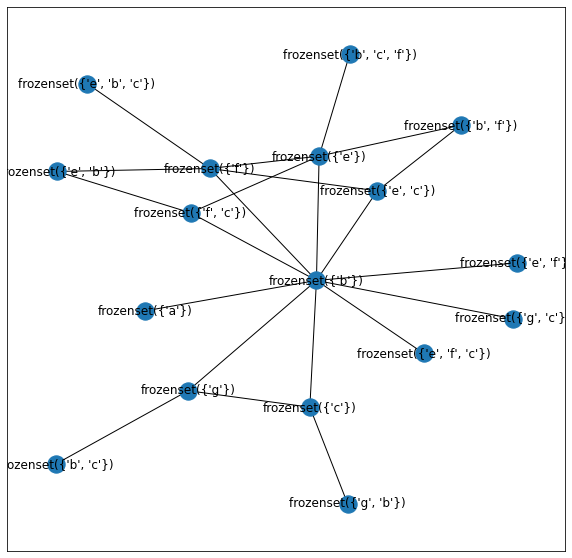

In [30]:
# 3.2.2.2.2 네트워크 그래프로 표현

# 연관규칙으로 부터 네트워크 그래프 생성
g = nx.Graph()
g = nx.from_pandas_edgelist(***, 
                            source = '***', 
                            target = '***')
# 관련 정보 출력
print(nx.info(g))

# 그래프 출력
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(g) # 배치 
nx.***(***, ***)

plt.show()

### 3.2.2.3 네트워크 출력 함수화

In [31]:
# 3.2.2.3 네트워크 다이어그램 반복 생성을 위한 함수화
# 3.2.2.3.1 함수 생성
def my_draw_nx (asso_rule_df, title = 'Network Graph', fontsize = 20) :

  import networkx as nx

  # antecedents,consequents 가 frozenset 이여서 레이블이 길다. 문자열로 변환
  nx_df = asso_rule_df[['antecedents','consequents']].copy()
  nx_df['antecedents'] = nx_df['antecedents'].apply(lambda x : str(set(x)))
  nx_df['consequents'] = nx_df['consequents'].apply(lambda x : str(set(x)))

  # 연관규칙으로 부터 네트워크 그래프 생성
  g = nx.Graph()
  g = nx.from_pandas_edgelist(nx_df, 
                              source = 'antecedents', 
                              target = 'consequents')
  # 관련 정보 출력
  print(nx.info(g))

  # 그래프 출력
  plt.figure(figsize=(10, 10))
  pos = nx.spring_layout(g, k = 0.30)

  nx.draw_networkx_labels(g,pos,font_size=fontsize)
  nx.draw_networkx(g,pos,  node_color = 'green', 
                   with_labels = False,
                   alpha = 0.3 ,
                   arrows = True, arrowsize = fontsize,)
  
  plt.title(title) # 그래프 제목
  
  plt.show()

Graph with 17 nodes and 22 edges


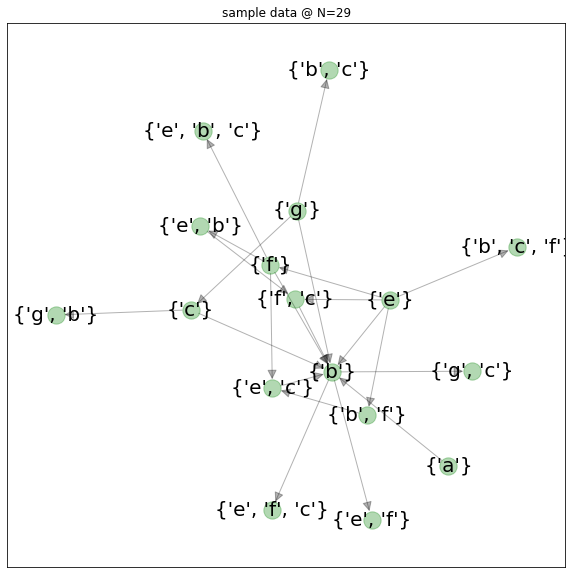

In [32]:
# 3.2.2.3.2 함수를 이용한 샘플데이터의 관계 그래프 출력
my_draw_nx(***, ***)

### 3.2.2.4 예시데이터 시각화

In [33]:
# 3.2.2.4 다양한 관계 규칙으로 그래프를 시도 (지지도를 0.5 이상으로 향상, 신뢰도 0.7)
# 3.2.2.4.1 간편하게 연관규칙을 도출하기 위해 apriori와 association_rules 일괄실행 함수화

def my_apri_asso (tr_df, min_sup=0.2, min_conf=0.5) :
  from mlxtend.frequent_patterns import apriori, association_rules
  
  # 빈발항목 생성
  freq_its = apriori (tr_df, 
                      min_support = min_sup, 
                      use_colnames = True)

  # 연관규칙 생성
  asso_rules = association_rules (freq_its, 
                                  metric= 'confidence', 
                                  min_threshold=min_conf)
  # 신뢰도, 향상도 내림차순 정렬
  asso_rules.sort_values(['confidence','lift'],
                         ascending = False, 
                         inplace = True)

  # 빈발항목 및 연관규칙 건수 출력
  print (f'frequent itemlist size : {freq_its.shape[0]},',
         f' association rule size : {asso_rules.shape[0]}')
 
  return asso_rules

frequent itemlist size : 13, association rule size 19
Graph with 11 nodes and 12 edges


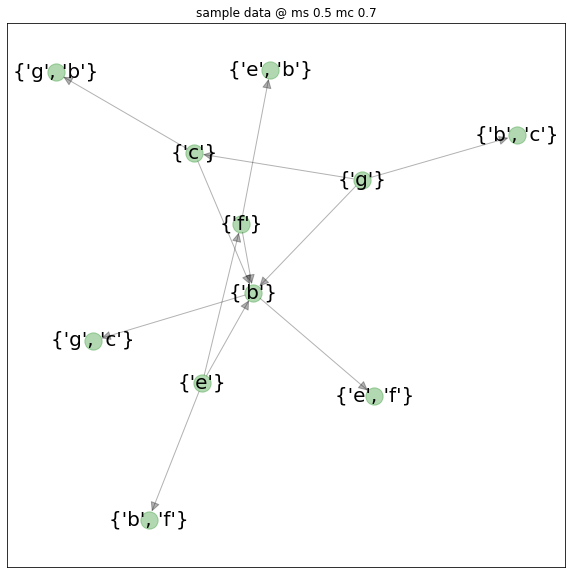

In [34]:
# 3.2.2.4.2 데이터 생성 후 네트워크 그래프 출력 
#      sample_tr @ (지지도를 0.5 이상으로 향상, 신뢰도 0.7)
asso_rule_sp_5_7 = my_apri_asso( ***, ***, ***)
my_draw_nx(asso_rule_sp_5_7, 'sample data @ ms 0.5 mc 0.7')

### 3.2.2.5 grocery 시각화

In [35]:
# 3.2.2.5 grocery 데이터의 연관규칙을 다양한 조건으로 시각화 하여 관찰한다. 

# 3.2.2.5.1 Hands_on에서 진행한 최소지지도 0.02, 신뢰도 0.3 연관규칙 생성
asso_rule_gr_02_3 = ***(grocery_tr, 0.02, 0.3)

frequent itemlist size : 122, association rule size 37


Graph with 28 nodes and 37 edges


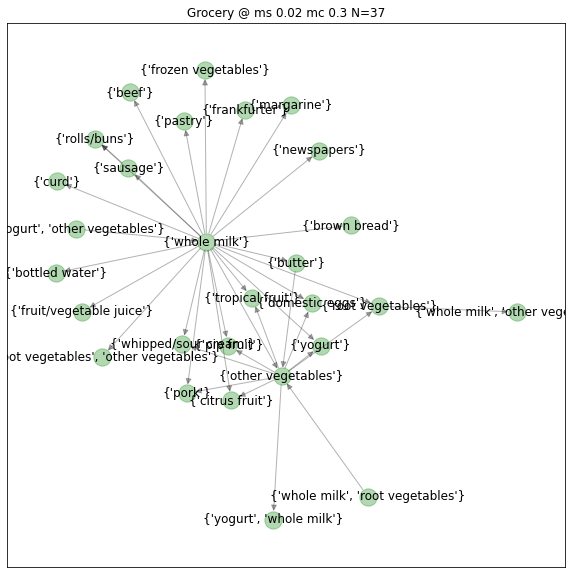

In [36]:
# 3.2.2.5.2 네트워크그래프 생성
***(asso_rule_gr_02_3 , 'Grocery @ ms 0.02 mc 0.3 N=37', fontsize = 12)

frequent itemlist size : 122, association rule size 15
Graph with 15 nodes and 15 edges


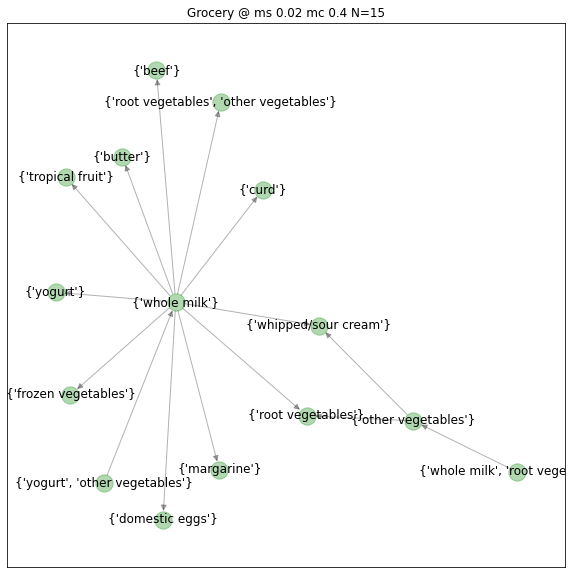

In [37]:
# 3.2.2.5.3 그래프가 복잡하다. 최소지지도 0.02, 최소신뢰도를 0.4로 상향 조정하여 살펴본다. 
asso_rule_gr_02_4 = my_apri_asso(grocery_tr, ***, ***)
my_draw_nx (***,'Grocery @ ms 0.02 mc 0.4 N=15', fontsize = 12)

frequent itemlist size : 333, association rule size 234
Graph with 44 nodes and 53 edges


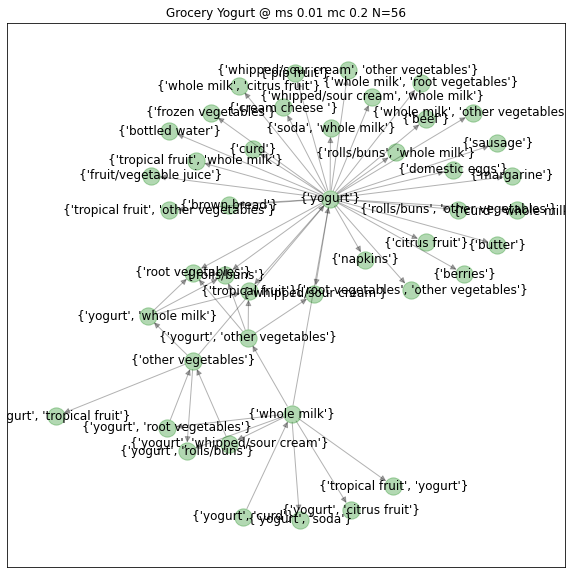

In [38]:
# 3.2.2.5.4 'yogurt' 와 관련된 관계가 궁금하다. 최소지지도 0.01, 최소신뢰도 0.2 에서 탐사해보자. 
asso_rule_gr_01_2 = my_apri_asso(grocery_tr, 0.01, 0.2)

filter = asso_rule_gr_01_2.antecedents.apply(lambda x :'yogurt' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x :'yogurt' in x) 

asso_rule_gr_01_2_yogurt = asso_rule_gr_01_2[filter]
asso_rule_gr_01_2_yogurt.shape
my_draw_nx (asso_rule_gr_01_2_yogurt,
            'Grocery Yogurt @ ms 0.01 mc 0.2 N=56', 
            fontsize = 12)

In [39]:
# 3.2.2.5.5 'sausage' 와 'beef'에 구매성향에 차이가 있을까?

filter_sausage = asso_rule_gr_01_2.antecedents.apply(lambda x : 'sausage' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x : 'sausage' in x) 

filter_beef = asso_rule_gr_01_2.antecedents.apply(lambda x : 'beef' in x) | \
         asso_rule_gr_01_2.consequents.apply(lambda x : 'beef' in x) 

asso_rule_gr_01_2_sausage = asso_rule_gr_01_2[***]
asso_rule_gr_01_2_beef = asso_rule_gr_01_2[***]
asso_rule_gr_01_2_sausage.shape, asso_rule_gr_01_2_beef.shape

((7, 9), (5, 9))

In [ ]:
my_draw_nx (***,'Grocery Sausage @ ms 0.01 mc 0.2 N=7', fontsize = 12)

In [ ]:
my_draw_nx (***,'Grocery Beefe @ ms 0.01 mc 0.2 N=5', fontsize = 12)